In [1]:
# importamos las librerias necesarias. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats

### Este notebook es para el análisis univariante de datos
- Exploraremos la distribución de variables individuales (análisis univariante) 
y las relaciones entre pares de variables (análisis bivariante).

In [2]:
df_demo = pd.read_csv('data/cleaned/df_final_demo_clean.csv')
df_demo.head(5)

,client_id,client_tenure_years,client_tenure_months,age,gender,number_of_accounts,balance,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33,F,2.0,103671.75,0.0,3.0


In [3]:
df_experiment = pd.read_csv('data/cleaned/df_final_experiment_clients_cleaned.csv')
df_experiment.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [4]:
df_web = pd.read_csv('data/cleaned/df_final_web_data.csv')
df_web.head(10)

,client_id,visitor_id,visit_id,process_step,date_time
0,1643,910842861_51062379179,379946188_1773022140_107963,start,2017-04-15 15:06:00
1,1643,910842861_51062379179,633860590_96880450633_976109,start,2017-04-24 06:36:07
2,1643,910842861_51062379179,633860590_96880450633_976109,step_1,2017-04-24 06:36:32
3,1643,910842861_51062379179,633860590_96880450633_976109,start,2017-04-24 06:37:17
4,1643,910842861_51062379179,633860590_96880450633_976109,start,2017-04-24 06:38:20
5,1677,361240963_15830034505,494607202_74539107264_966618,start,2017-03-31 10:59:27
6,1677,361240963_15830034505,494607202_74539107264_966618,step_1,2017-03-31 10:59:41
7,1677,361240963_15830034505,494607202_74539107264_966618,step_2,2017-03-31 11:00:40
8,1677,361240963_15830034505,494607202_74539107264_966618,start,2017-03-31 11:01:50
9,1680,262688118_24224945474,807102410_81976926205_767113,start,2017-03-15 09:57:21


#### Analisis univariable. 


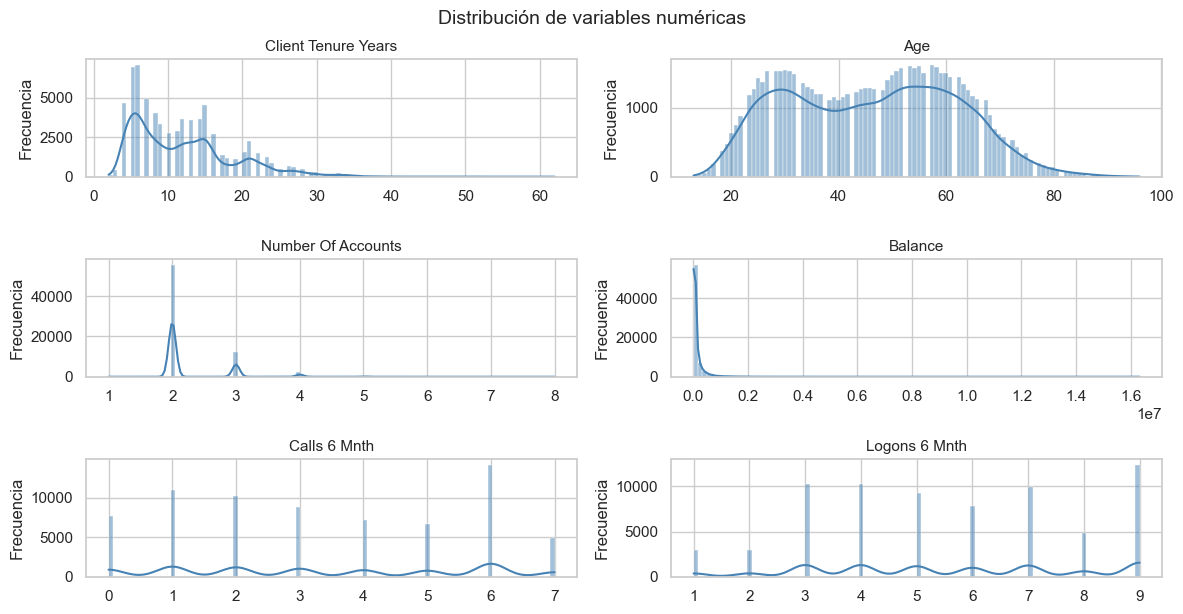

In [5]:
# Columnas a graficar (asegúrate que existen en el df)
cols_to_plot = ['client_tenure_years', 'age', 'number_of_accounts', 'balance', 'calls_6_mnth', 'logons_6_mnth']
cols_to_plot = [col for col in cols_to_plot if col in df_demo.columns]

# Configura el estilo visual
sns.set(style="whitegrid")

# Crear figura general
plt.figure(figsize=(12, 6))

# Iterar y graficar cada histograma
for idx, col in enumerate(cols_to_plot, 1):
    plt.subplot(3, 2, idx)
    sns.histplot(df_demo[col], bins=100, kde=True, color='steelblue')
    plt.title(col.replace('_', ' ').title(), fontsize=11)
    plt.xlabel('')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.suptitle('Distribución de variables numéricas', fontsize=14, y=1.02)
plt.show()

- Para el analisis de este caso nos quedaremos con las variables de la edad y permanencia.  
- Para ello vamos a comprobar antes de trabajar con los datos para la hipotesis las siguientes caracteristicas: 
    - Tipo de distribucion.
    - Outliers. 

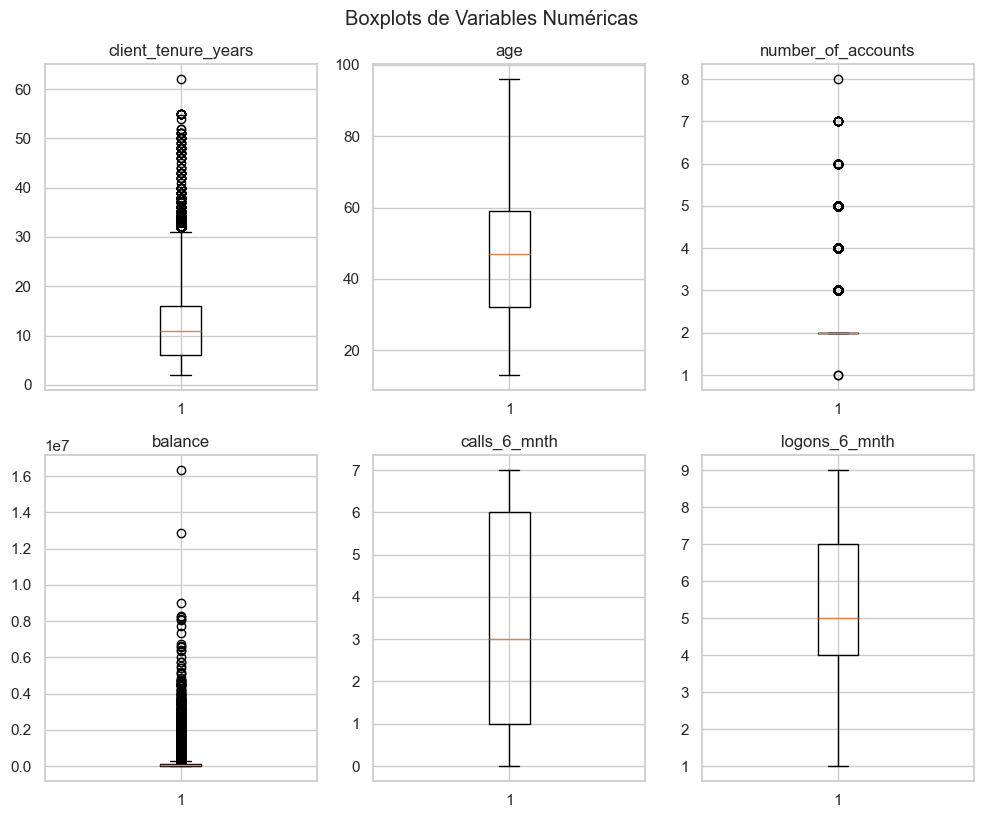

In [6]:
# comrpobamos outliers de las diferentes variables
def plot_boxplots_outliers(df):
    """
    Genera boxplots para cada columna numérica en el DataFrame proporcionado.
    
    Parameters:
        df (DataFrame): DataFrame que contiene las columnas numéricas.
    """

    # Configurar el tamaño de la figura
    num_columns = df.shape[1]
    num_rows = (num_columns // 3) + (num_columns % 3 > 0)  # Calcular número de filas necesarias
    plt.figure(figsize=(10, num_rows * 4))  # Ajustar el tamaño en función del número de filas

    # Iterar sobre cada columna y generar un boxplot
    for i, column in enumerate(df.columns):
        plt.subplot(num_rows, 3, i + 1)  # Cambia el tamaño de la cuadrícula según el número de columnas
        plt.boxplot(df[column].dropna())  # Elimina valores NaN antes de graficar
        plt.title(column)
        plt.grid(True)

    plt.tight_layout()  # Ajustar el espaciado entre los gráficos
    plt.suptitle('Boxplots de Variables Numéricas', y=1.02)  # Ajustar el título para que no se superponga
    plt.show()
    
plot_boxplots_outliers(df_demo[cols_to_plot])

- Question 1. Are the primary clients younger or older? 

In [7]:
age_frequency_table = df_demo['age'].value_counts()
age_frequency_table

age
57    1616
55    1599
53    1596
58    1581
52    1567
      ... 
93       7
94       4
96       2
95       1
13       1
Name: count, Length: 84, dtype: int64

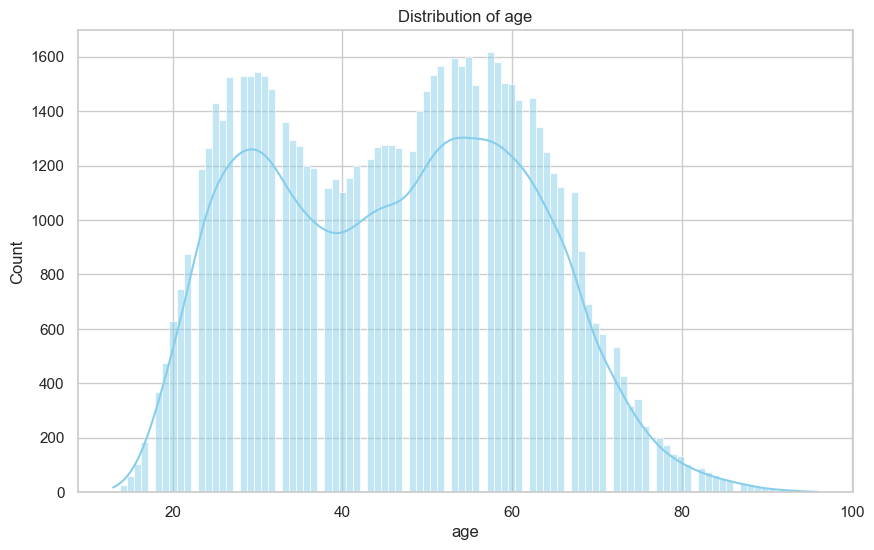

In [8]:
# Comprobamos la distribucion de la edad con un histograma. 
plt.figure(figsize=(10, 6))
sns.histplot(data=df_demo[df_demo['age']<100]["age"], bins=100, kde=True, color="skyblue")
plt.title('Distribution of age')
plt.show()

In [9]:
#Comprobamos si la variables 'age' atiende a una distribucion normal con el test de Shapiro-Wilk
shapiro_test = stats.shapiro(df_demo['age'])
print(f"Shapiro-Wilk test statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")
# Interpretación del resultado del test de Shapiro-Wilk
if shapiro_test.pvalue > 0.05:
    print("La variable 'age' sigue una distribución normal.")
else:
    print("La variable 'age' no sigue una distribución normal.")


Shapiro-Wilk test statistic: 0.9749316444182788, p-value: 1.9906377142125755e-71
La variable 'age' no sigue una distribución normal.


c:\Users\franc\ENTORNO TRABAJO DATA y BI\IRONHACK\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 70594.
  res = hypotest_fun_out(*samples, **kwds)


La variable age presenta una distribución bimodal y asimétrica hacia la derecha, con una baja pero válida presencia de personas mayores de 80 años. Dado que estos valores no parecen errores ni casos atípicos extremos, y probablemente reflejan segmentos reales de clientes, no se consideró necesario eliminar outliers. En su lugar, se decidió mantener la distribución completa para preservar la representatividad del conjunto de datos en el análisis posterior.

- Question 2. Are the primary clients new or long-standing?


In [10]:
tenure_frequency_table = df_demo['client_tenure_years'].value_counts()
tenure_frequency_table.head()

client_tenure_years
6.0     7092
5.0     6955
7.0     4955
4.0     4687
15.0    4564
Name: count, dtype: int64

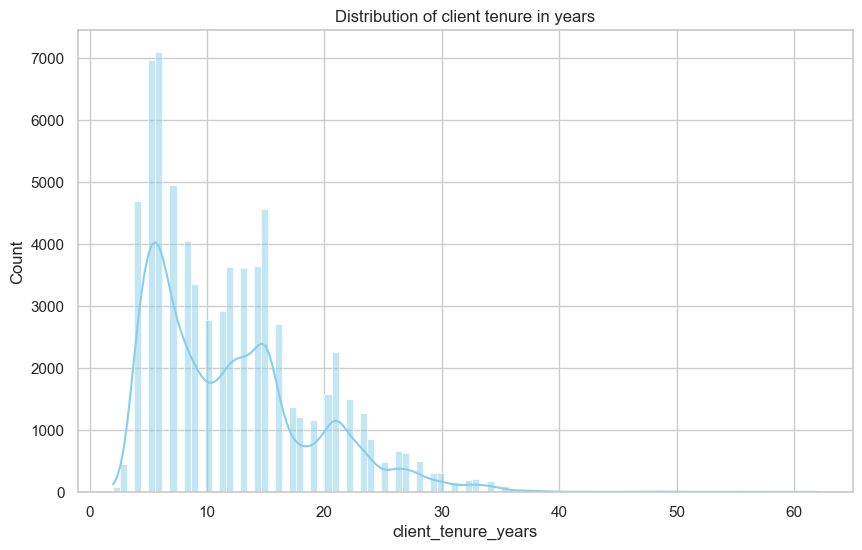

In [11]:
# Comprobamos la distribucion de la permanencia con un histograma.  
plt.figure(figsize=(10, 6))
sns.histplot(data=df_demo['client_tenure_years'], bins=100, kde=True, color="skyblue")
plt.title('Distribution of client tenure in years')
plt.show()

In [12]:
# Comprobamos la distribucion de la permanencia con el test de Shapiro-Wilk
shapiro_test_tenure = stats.shapiro(df_demo['client_tenure_years'])
print(f"Shapiro-Wilk test statistic for tenure: {shapiro_test_tenure
.statistic}, p-value: {shapiro_test_tenure.pvalue}")
# Interpretación del resultado del test de Shapiro-Wilk para la permanencia
if shapiro_test_tenure.pvalue > 0.05:
    print("La variable 'client_tenure_years' sigue una distribución normal.")
else:
    print("La variable 'client_tenure_years' no sigue una distribución normal.")
    

Shapiro-Wilk test statistic for tenure: 0.9119803420833275, p-value: 2.6987301380458497e-101
La variable 'client_tenure_years' no sigue una distribución normal.


c:\Users\franc\ENTORNO TRABAJO DATA y BI\IRONHACK\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 70594.
  res = hypotest_fun_out(*samples, **kwds)


##### Borramos Outliers de la variable clients_ternure_years. 

Durante el análisis exploratorio de la variable client_tenure_years, se observó una distribución fuertemente asimétrica hacia la derecha, lo que descarta la suposición de normalidad. Por este motivo, se optó por utilizar el método del rango intercuartílico (IQR) para identificar y remover outliers. Este método es más robusto ante la presencia de sesgo en los datos y no se ve afectado por valores extremos como lo haría el método basado en desviación estándar. Esto asegura una limpieza de datos más precisa y mejora la validez estadística de las métricas empleadas en el A/B Test posterior.

In [13]:
def remove_outliers_iqr(df, column):
    # Calculate Q1 and Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outliers as those below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    df_filtered = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    
    return df_filtered

# usage:
df_demo_tenure_clean = remove_outliers_iqr(df_demo, 'client_tenure_years')

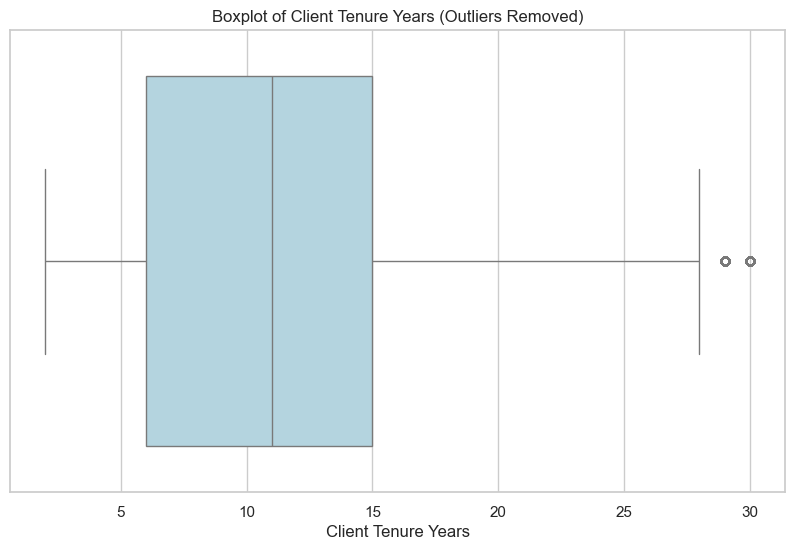

In [14]:
#comprobamos los outliers de la variable 'client_tenure_years' con un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_demo_tenure_clean['client_tenure_years'], color='lightblue')
plt.title('Boxplot of Client Tenure Years (Outliers Removed)')
plt.xlabel('Client Tenure Years')
plt.show()

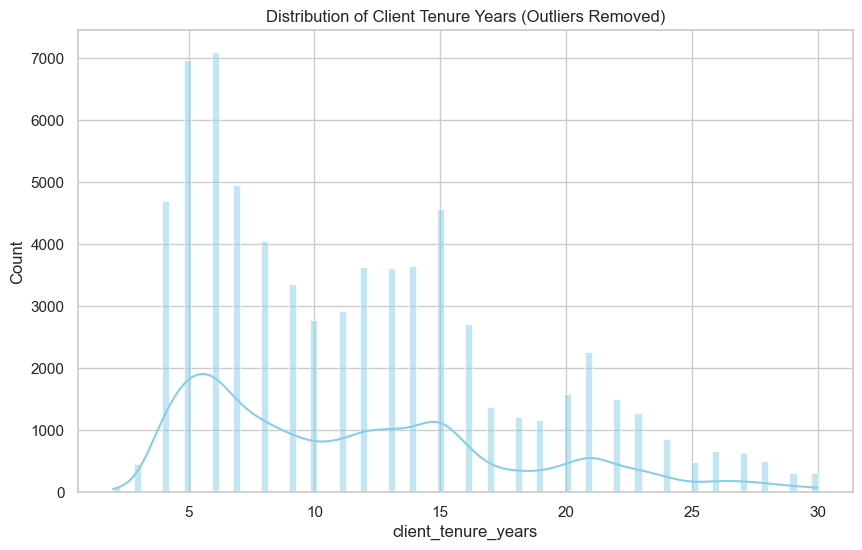

In [15]:
#comprobamos la distribucion de la permanencia sin outliers con un histograma.
plt.figure(figsize=(10, 6))
sns.histplot(data=df_demo_tenure_clean['client_tenure_years'], bins=100, kde=True, color="skyblue")
plt.title('Distribution of Client Tenure Years (Outliers Removed)')
plt.show()

Se ha eliminado la cola derecha extrema, que antes contenía valores poco frecuentes y posiblemente no representativos.

La forma general de la distribución se mantiene sesgada a la derecha, pero con una dispersión mucho más manejable.

Esto reduce la varianza extrema y mejora la robustez de cualquier análisis comparativo posterior, como un A/B Test.

Question 3. are the primary clients high o low balance? 

In [16]:
balance_frequency_table = df_demo['balance'].value_counts()
balance_frequency_table.head()

balance
31188.62    5
29388.51    4
24953.79    3
29388.50    3
29389.11    3
Name: count, dtype: int64

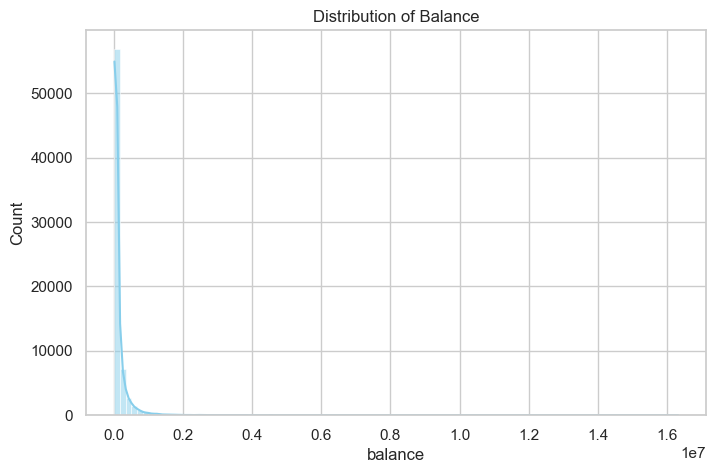

In [29]:
# comprobamos la distribucion del balance con un histograma.
plt.figure(figsize=(8, 5))
sns.histplot(data=df_demo['balance'], bins=100, kde=True, color="skyblue")
plt.title('Distribution of Balance')
plt.show()


In [18]:
# comprobamos si la variable 'balance' atiende a una distribucion normal con el test de Shapiro-Wilk
shapiro_test_balance = stats.shapiro(df_demo['balance'])
print(f"Shapiro-Wilk test statistic for balance: {shapiro_test_balance.statistic}, p-value: {shapiro_test_balance.pvalue}")
# Interpretación del resultado del test de Shapiro-Wilk para el balance
if shapiro_test_balance.pvalue > 0.05:
    print("La variable 'balance' sigue una distribución normal.")
else:
    print("La variable 'balance' no sigue una distribución normal.")
    

Shapiro-Wilk test statistic for balance: 0.36520627701640906, p-value: 4.839226645518754e-159
La variable 'balance' no sigue una distribución normal.


c:\Users\franc\ENTORNO TRABAJO DATA y BI\IRONHACK\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 70594.
  res = hypotest_fun_out(*samples, **kwds)


El rango intercuartílico (IQR) de 'balance' está entre Q1=35205.07 y Q3=101312.08


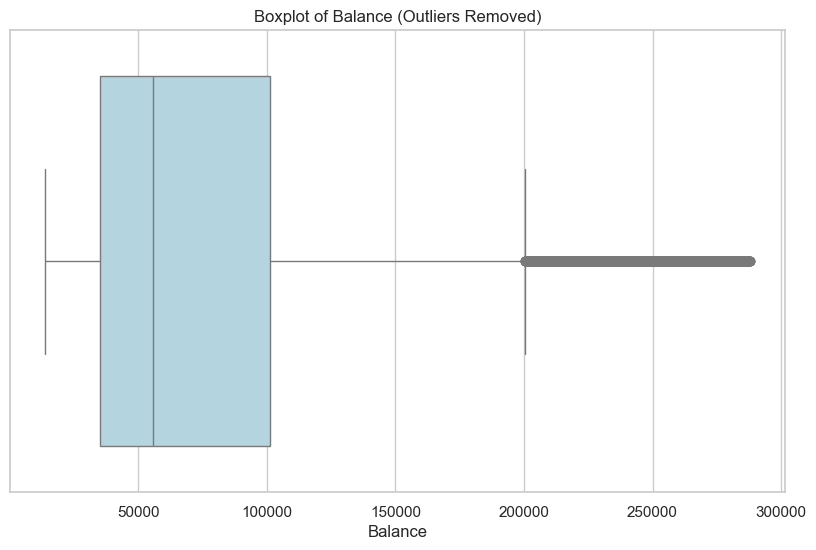

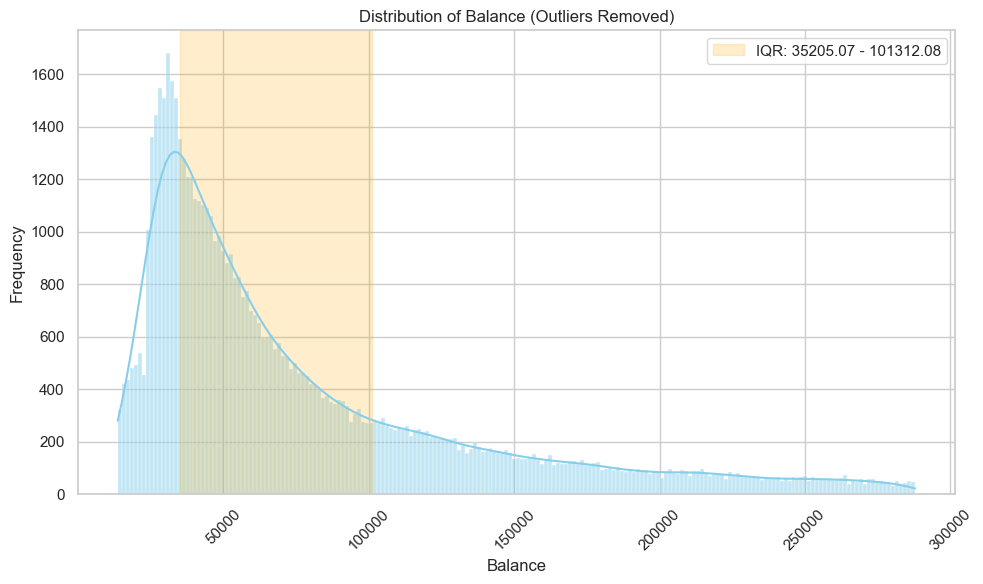

In [30]:
remove_outliers_balance = remove_outliers_iqr(df_demo, 'balance')

# Calcular Q1 y Q3 para 'balance'
q1 = remove_outliers_balance['balance'].quantile(0.25)
q3 = remove_outliers_balance['balance'].quantile(0.75)
print(f"El rango intercuartílico (IQR) de 'balance' está entre Q1={q1:.2f} y Q3={q3:.2f}")

# Boxplot de balance sin outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=remove_outliers_balance['balance'], color='lightblue')
plt.title('Boxplot of Balance (Outliers Removed)')
plt.xlabel('Balance')
plt.show()

# Histograma de balance sin outliers, resaltando el rango IQR
plt.figure(figsize=(10, 6))
sns.histplot(data=remove_outliers_balance['balance'], bins=200, kde=True, color="skyblue")
plt.axvspan(q1, q3, color='orange', alpha=0.2, label=f'IQR: {q1:.2f} - {q3:.2f}')
plt.title('Distribution of Balance (Outliers Removed)')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


call_6_month 


In [20]:
#calls_6_month. Numerical.
# 2.1. Central Tendency: Calculating the mean, median, and mode
def calculate_central_tendency(df, column):
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]  # mode() returns a Series, so take the first element

    # Displaying the results
    print("Mean:", mean)
    print("Median:", median)
    print("Mode:", mode)
    
calculate_central_tendency(df_demo, 'calls_6_mnth')

Mean: 3.382468765050854
Median: 3.0
Mode: 6.0


In [21]:
# 2.2. Measures of Dispersion 
def calculate_measures_of_dispersion(df, column):
    variance = df[column].var()
    std_dev = df[column].std()
    min_val = df[column].min()
    max_val = df[column].max()
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # Displaying the results
    print(f"Variance of {column}:", variance)
    print(f"Standard Deviation of {column}:", std_dev)
    print(f"Minimum {column}:", min_val)
    print(f"Maximum {column}:", max_val)
    print(f"1st Quartile (Q1) of {column}:", q1)
    print(f"3rd Quartile (Q3) of {column}:", q3)
    print(f"Interquartile Range (IQR) of {column}:", iqr)

# usage:
calculate_measures_of_dispersion(df_demo, 'calls_6_mnth')

Variance of calls_6_mnth: 5.002356371646297
Standard Deviation of calls_6_mnth: 2.236594816153855
Minimum calls_6_mnth: 0.0
Maximum calls_6_mnth: 7.0
1st Quartile (Q1) of calls_6_mnth: 1.0
3rd Quartile (Q3) of calls_6_mnth: 6.0
Interquartile Range (IQR) of calls_6_mnth: 5.0


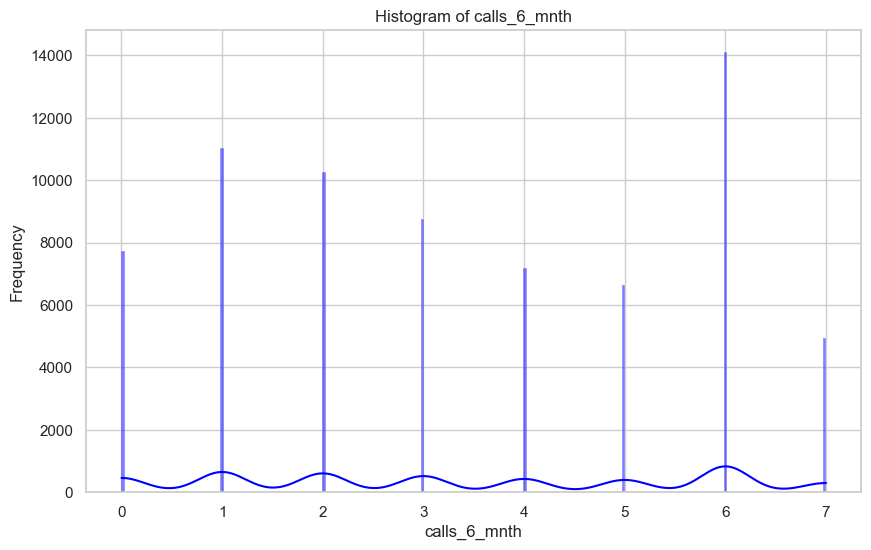

In [22]:
def plot_histogram(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=200, kde=True, color="blue")
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

plot_histogram(df_demo, 'calls_6_mnth')

In [23]:
#logons_6_month. Numerical.
# 1.2. Central Tendency: Calculating the mean, median, and mode
def calculate_central_tendency(df, column):
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]  # mode() returns a Series, so take the first element

    # Displaying the results
    print("Mean:", mean)
    print("Median:", median)
    print("Mode:", mode)
    
calculate_central_tendency(df_demo, 'logons_6_mnth')

Mean: 5.566719551236649
Median: 5.0
Mode: 9.0


In [24]:
# 2.2. Measures of Dispersion 
def calculate_measures_of_dispersion(df, column):
    variance = df[column].var()
    std_dev = df[column].std()
    min_val = df[column].min()
    max_val = df[column].max()
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # Displaying the results
    print(f"Variance of {column}:", variance)
    print(f"Standard Deviation of {column}:", std_dev)
    print(f"Minimum {column}:", min_val)
    print(f"Maximum {column}:", max_val)
    print(f"1st Quartile (Q1) of {column}:", q1)
    print(f"3rd Quartile (Q3) of {column}:", q3)
    print(f"Interquartile Range (IQR) of {column}:", iqr)

# usage:
calculate_measures_of_dispersion(df_demo, 'logons_6_mnth')

Variance of logons_6_mnth: 5.538003072736324
Standard Deviation of logons_6_mnth: 2.353296214405727
Minimum logons_6_mnth: 1.0
Maximum logons_6_mnth: 9.0
1st Quartile (Q1) of logons_6_mnth: 4.0
3rd Quartile (Q3) of logons_6_mnth: 7.0
Interquartile Range (IQR) of logons_6_mnth: 3.0


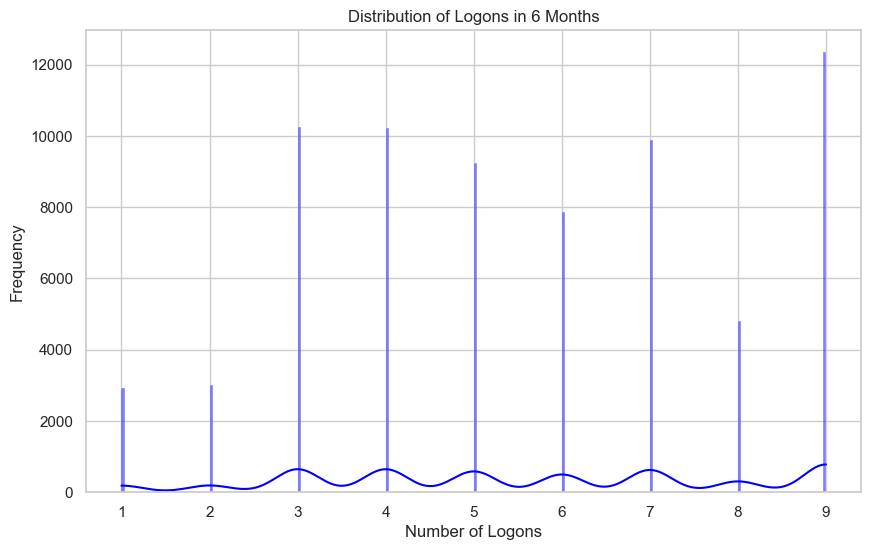

In [25]:
#2.3. Shape of Distribution Numerical  Continuous Variables

plt.figure(figsize=(10, 6))
sns.histplot(data=df_demo, x='logons_6_mnth', bins=200, kde=True, color="blue")
plt.title('Distribution of Logons in 6 Months')
plt.xlabel('Number of Logons')
plt.ylabel('Frequency')
plt.show()